hello glucose
-----------------------------------------


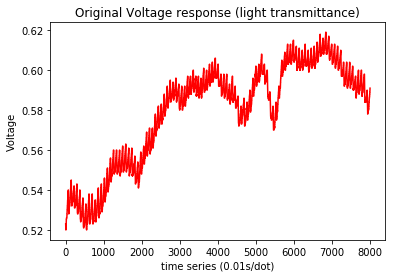

-----------------------------------------
[4745.388      +0.j          -59.14389631+93.1464j
  -18.99551503+75.93342906j ...  -10.66233148-11.07012958j
  -18.99551503-75.93342906j  -59.14389631-93.1464j    ]
-----------------------------------------
[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
-----------------------------------------


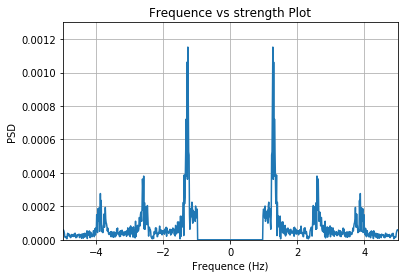

-----------------------------------------
[-1.26953125  1.26953125] [9.43818848 9.43818848]
-----------------------------------------


C:\Users\richard.weng\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


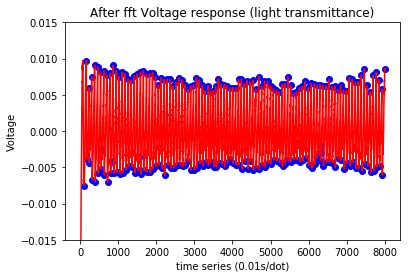

-----------------------------------------
      Frequency           PSD
0    -50.000000  6.347656e-06
1    -49.987793  3.254486e-06
2    -49.975586  4.206244e-06
3    -49.963379  3.274818e-06
4    -49.951172  3.450361e-06
5    -49.938965  3.087909e-06
6    -49.926758  2.128451e-06
7    -49.914551  4.929953e-06
8    -49.902344  4.324767e-06
9    -49.890137  4.960712e-06
10   -49.877930  6.866429e-06
11   -49.865723  8.948379e-07
12   -49.853516  3.527139e-06
13   -49.841309  2.351114e-06
14   -49.829102  3.889373e-06
15   -49.816895  3.516515e-06
16   -49.804688  4.938456e-06
17   -49.792480  2.943799e-06
18   -49.780273  2.770533e-06
19   -49.768066  7.214355e-06
20   -49.755859  2.367655e-06
21   -49.743652  8.663959e-07
22   -49.731445  4.019035e-06
23   -49.719238  2.024298e-06
24   -49.707031  3.631037e-06
25   -49.694824  6.952418e-06
26   -49.682617  1.065185e-06
27   -49.670410  4.593008e-06
28   -49.658203  7.338796e-06
29   -49.645996  7.775375e-06
...         ...           ..

In [2]:
import numpy as np
from numpy.fft import fft, ifft,fftfreq, fftshift
from scipy import linspace
import matplotlib.pyplot as plt
import peakutils 
from pandas import DataFrame
import pandas as pd

# -----------setting parameters ---------------

# set source path
path = 'C:\\Users\\richard.weng\\Documents\\Python Scripts\\python_projects\\(1) NIVG Project\\Glucose FFT\\rawdata_diabetes.txt'
# set save path
path_save = 'C:\\Users\\richard.weng\\Documents\\Python Scripts\\python_projects\\(1) NIVG Project\\Glucose FFT\\rawdata_diabetes_precessed.txt'
# set save path for peak_valley
path_save_peakValley = 'C:\\Users\\richard.weng\\Documents\\Python Scripts\\python_projects\\(1) NIVG Project\\Glucose FFT\\rawdata_diabetes_peakValleys.txt'
# set the window size for filtering out low frequencies, the bigger the size, the more low frequencies would be block out
freqHz = 1
window_size = int(80*freqHz)
# set the winodw size2 for filtering out high frequencies
freqHz1 = 0
window_size1 = int(80*freqHz1)
# set the winodw size1 for filtering out range frequencies
freqHz2 = 0
freqHz3 = 0
window_size2 = int(80*freqHz2)
window_size3 = int(80*freqHz3)
# set the viewing window for display
viewing_window = 8000
# ------------end of setteing ---------------

# read-in txt file
file1 = open(path, 'r',encoding = 'utf-8-sig')
print ("hello glucose")
print("-----------------------------------------")

# create a list for raw data storage
list_diabetes = []

# put data into the raw data list
for line in file1:
    list_diabetes.append(float(line.rstrip('\n')))

# plotting the raw data
plt.plot(list_diabetes[:viewing_window], 'r')
plt.title('Original Voltage response (light transmittance)')
plt.xlabel('time series (0.01s/dot)')
plt.ylabel('Voltage')
plt.show()
print("-----------------------------------------")

# do fft
ffted_list_diabetes = np.fft.fft(list_diabetes)
print (ffted_list_diabetes)
print("-----------------------------------------")
# set low frequencies to zero
if window_size >0:
    ffted_list_diabetes[:window_size] = 0
    ffted_list_diabetes[-window_size:] = 0
else:
    pass
# set high frequencies to zero
if window_size1 >0:
    ffted_list_diabetes[window_size1:-window_size1] = 0
else:
    pass
# set range frequencies to zero
if window_size2 >0:
    ffted_list_diabetes[window_size2:window_size3] = 0
    ffted_list_diabetes[-window_size3:-window_size2] = 0
else:
    pass
print (ffted_list_diabetes)
np.savetxt("ffted_list_diabetes.txt", ffted_list_diabetes, fmt="%s")
print("-----------------------------------------")

# plot the fft data
# number of signal points
N = len(ffted_list_diabetes)
# sample spacing
T = 0.01
x = np.linspace(0.0, N*T, N)
yf = ffted_list_diabetes
## Get Power Spectral Density
signalPSD = np.abs(fftshift(yf))
PSDplot = 1.0/N*signalPSD

## Get frequencies corresponding to signal PSD
xf = fftfreq(N, T)
xf = fftshift(xf)

# Start plot
plt.plot(xf, PSDplot, label="test 1")
plt.xlim(-5,5) #setting x axis range
plt.ylim(0,0.0013) #setting y axis range
plt.grid()
plt.title('Frequence vs strength Plot')
plt.xlabel('Frequence (Hz)')
plt.ylabel('PSD')
plt.show()
print("-----------------------------------------")

#Find peak
indexes1 = peakutils.indexes(np.array(PSDplot), thres=0.0005/max(np.array(PSDplot)), min_dist=8 )
print(xf[indexes1], signalPSD[indexes1])
plt.plot (xf[indexes1], PSDplot[indexes1])
print("-----------------------------------------")

# do ifft
cut_ifft_ffted_list_diabetes = np.fft.ifft(ffted_list_diabetes)
np.savetxt("cut_ifft_ffted_list_diabetes.txt", cut_ifft_ffted_list_diabetes, fmt="%s")

# find the peaks
indexes = peakutils.indexes(np.array(cut_ifft_ffted_list_diabetes), thres=0.0001/max(np.array(cut_ifft_ffted_list_diabetes)), min_dist=40)
peak_valley_indexes = []
count = 0
index_pre = []
for ii in indexes:
    if count == 0:
        index_pre = ii
        count = count +1
    else:
        interval = cut_ifft_ffted_list_diabetes.real[index_pre:ii].tolist()
        peak_valley_indexes.append(interval.index(min(interval))+index_pre)
        peak_valley_indexes.append(ii)
        index_pre = ii
        count = count +1

# plot the processed data
time = linspace(1,viewing_window,viewing_window)
indexes = np.asarray(peak_valley_indexes)
plt.plot(time[indexes[indexes<viewing_window]],(cut_ifft_ffted_list_diabetes)[indexes[indexes<viewing_window]],'bo')
plt.plot(time,cut_ifft_ffted_list_diabetes[:viewing_window], 'r')
plt.title('After fft Voltage response (light transmittance)')
plt.xlabel('time series (0.01s/dot)')
plt.ylabel('Voltage')
plt.ylim(-0.015,0.015) #setting y axis range
plt.show()
print("-----------------------------------------")

# save the processed data
fileObject = open(path_save,"w")
for item in cut_ifft_ffted_list_diabetes.real:
    fileObject.write("%s\n" % item)
fileObject.close()

# save the peak valley data
fileObject = open(path_save_peakValley,"w")
for ii in peak_valley_indexes:
    fileObject.write("%s\n" % cut_ifft_ffted_list_diabetes[ii].real)
fileObject.close()

# save the Frequency data
df_PSD=DataFrame({'Frequency':xf, "PSD":PSDplot})
print (df_PSD)
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Frequency.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_PSD.to_excel(writer, sheet_name='Sheet1',index=False)

#---------------------------------------------------------------#
# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']
# Create a new scatter chart.
#---------------------------------------------------------------#
chart1 = workbook.add_chart({'type': 'scatter'})
# Configure the first series.
chart1.add_series({
    'name': '=Sheet1!$A$1',
    'categories': '=Sheet1!$A$2:$A$8193',
    'values': '=Sheet1!$B$2:$B$8193', 'marker size':0.3
})

# Add a chart title and some axis labels.
chart1.set_title ({'name': 'Frequence vs strength Plot'})
chart1.set_x_axis({'name': 'Frequence (Hz)','min':-5,'max':5})
chart1.set_y_axis({'name': 'PSD','min':0,'max':0.0013})
chart1.set_legend({'position':'top'})

# Set an Excel chart style.
chart1.set_style(11)
# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart('D2', chart1, {'x_offset': 25, 'y_offset': 10})
#---------------------------------------------------------------#
chart2 = workbook.add_chart({'type': 'scatter',
                             'subtype': 'straight_with_markers'})

# Configure the first series.
chart2.add_series({
    'name':       '=Sheet1!$A$1',
    'categories': '=Sheet1!$A$2:$A$8193',
    'values':     '=Sheet1!$B$2:$B$8193',
})

# Add a chart title and some axis labels.
chart2.set_title ({'name': 'Frequence vs strength Plot'})
chart2.set_x_axis({'name': 'Frequence (Hz)','min':-5,'max':5})
chart2.set_y_axis({'name': 'PSD','min':0,'max':0.0013})
chart2.set_legend({'position':'top'})

# Set an Excel chart style.
chart2.set_style(12)

# Insert the chart into the worksheet (with an offset).
worksheet.insert_chart('D18', chart2, {'x_offset': 25, 'y_offset': 10})

workbook.close()